In [29]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.corpus import kolaw
from konlpy.tag import Okt

In [2]:
file_names = gutenberg.fileids()
file_names

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice[:500])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [4]:
token_alice = word_tokenize(doc_alice)
print(len(token_alice))
print(token_alice[:20])

33494
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [5]:
lemma = WordNetLemmatizer()
lemma_token_alice = [lemma.lemmatize(token) for token in token_alice]
lemma_token_alice[:20]

['[',
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'wa',
 'beginning']

In [6]:
tokenizer = RegexpTokenizer("[\w']{3,}")
re_token_alice = tokenizer.tokenize(doc_alice.lower())
print(len(re_token_alice))
print(re_token_alice[:20])

21616
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [7]:
english_stops = set(stopwords.words('english'))
result_alice = [word for word in re_token_alice if word not in english_stops]
print(len(result_alice))
print(result_alice[:30])

12999
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', "'and", 'use', 'book', 'thought', 'alice', "'without"]


In [8]:
lemma = WordNetLemmatizer()
lemma_token_alice = [lemma.lemmatize(word) for word in result_alice]
print(len(lemma_token_alice))
print(lemma_token_alice[:30])

12999
["alice's", 'adventure', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'picture', 'conversation', "'and", 'use', 'book', 'thought', 'alice', "'without"]


In [9]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
print(len(alice_word_count))

2687


In [10]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

In [11]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

In [12]:
alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
print(len(alice_word_count))

1726


In [13]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

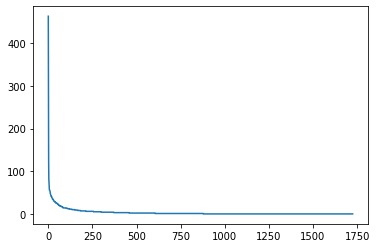

In [14]:
w = [alice_word_count[key] for key in sorted_word_count]
plt.plot(w)

<BarContainer object of 20 artists>

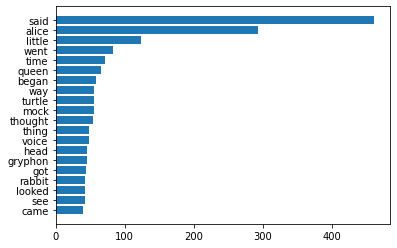

In [15]:
n = sorted_word_count[:20][::-1]
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)), w, tick_label=n)

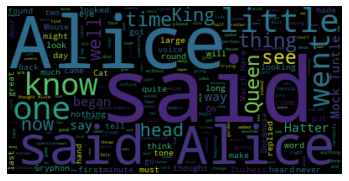

In [17]:
wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

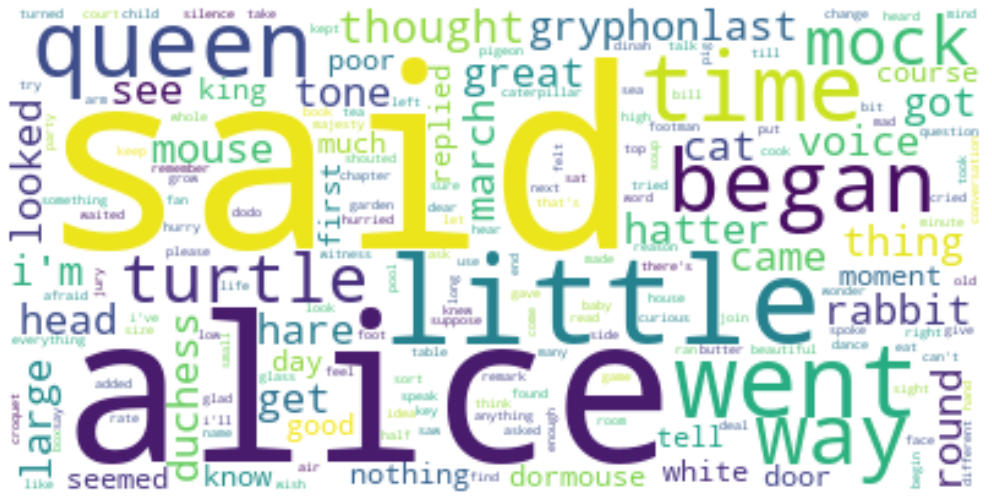

In [21]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(alice_word_count)
plt.figure(figsize=(18, 9))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [24]:
const_doc = kolaw.open('constitution.txt').read()
print(type(const_doc))
print(len(const_doc))
print(const_doc[:500])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 


In [26]:
t = Okt()
tokens_const = t.morphs(const_doc)
print(len(tokens_const))
print(tokens_const[:100])

8796
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [27]:
tokens_const = t.nouns(const_doc)
print(len(tokens_const))
print(tokens_const[:100])

3882
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [28]:
tokens_const = [token for token in tokens_const if len(token) > 1]
print(len(tokens_const))
print(tokens_const[:100])

3013
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


In [30]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [31]:
const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

In [32]:
def word_graph(cnt, max_words=10):
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)), w, tick_label=n)
    plt.show()

[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


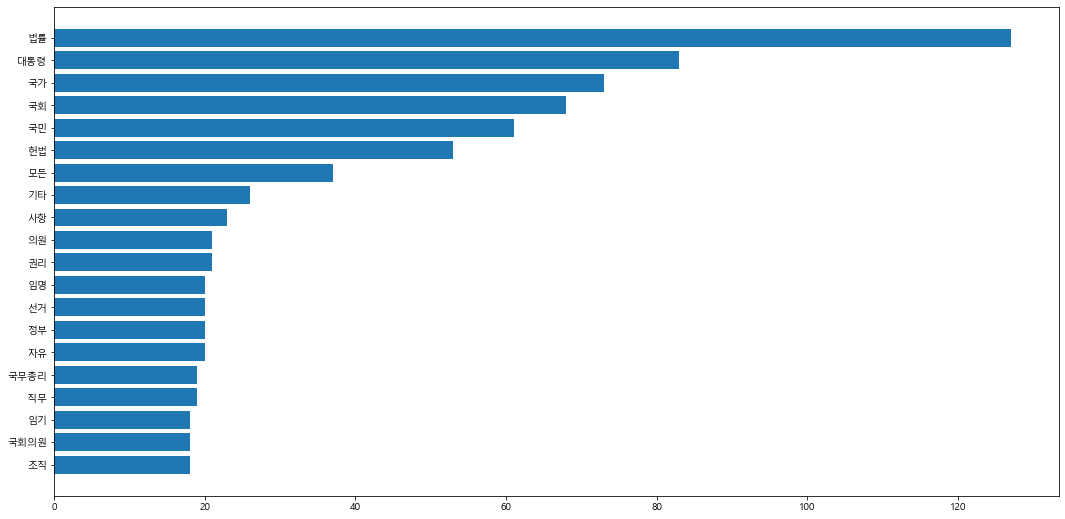

In [33]:
plt.figure(figsize=(18, 9))
word_graph(const_cnt, max_words=20)

In [34]:
font_path = 'c:/Windows/Fonts/malgun.ttf'

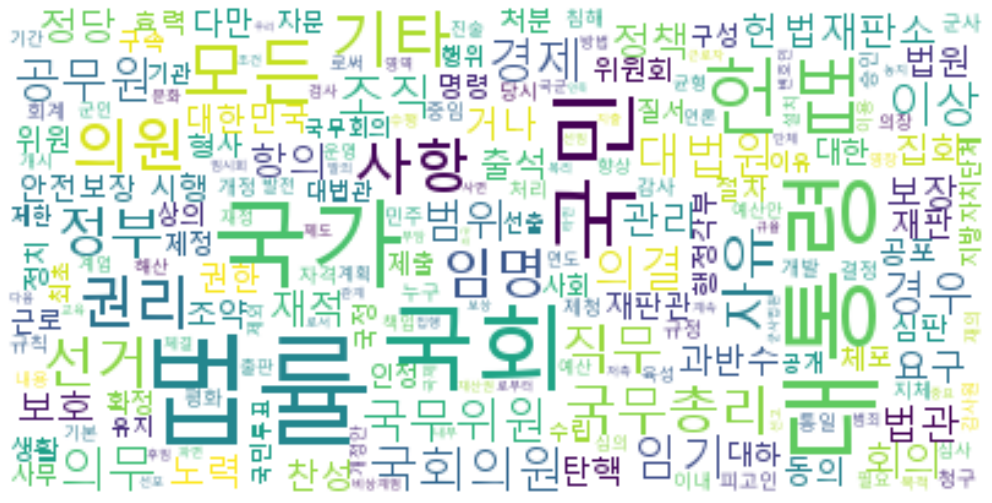

In [35]:
wc = WordCloud(font_path=font_path, background_color='white')
wordcloud = wc.generate_from_frequencies(const_cnt)
plt.figure(figsize=(18, 9))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()